<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/ClothesClasiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [21]:
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [22]:
metadata


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

In [23]:
data_train, data_test = data['train'], data['test']

In [24]:
class_names = metadata.features['label'].names

In [25]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [26]:
# Normalizar los datos, pasar de 0-255 a 0-1
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # Aqui pasa de 0-255 a 0-1
  return images, labels

In [27]:
# Normalize the data_train
data_train = data_train.map(normalize)
data_test = data_test.map(normalize)

In [28]:
# add to cache
data_train = data_train.cache()
data_test = data_test.cache()

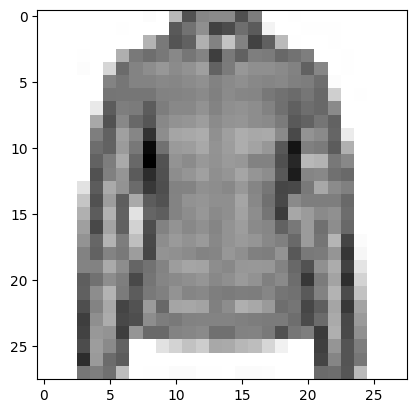

In [29]:
# show the images
for image, label in data_test.take(1):
  break
image = image.numpy().reshape((28,28))

import matplotlib.pyplot as plt

# draw
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.show()

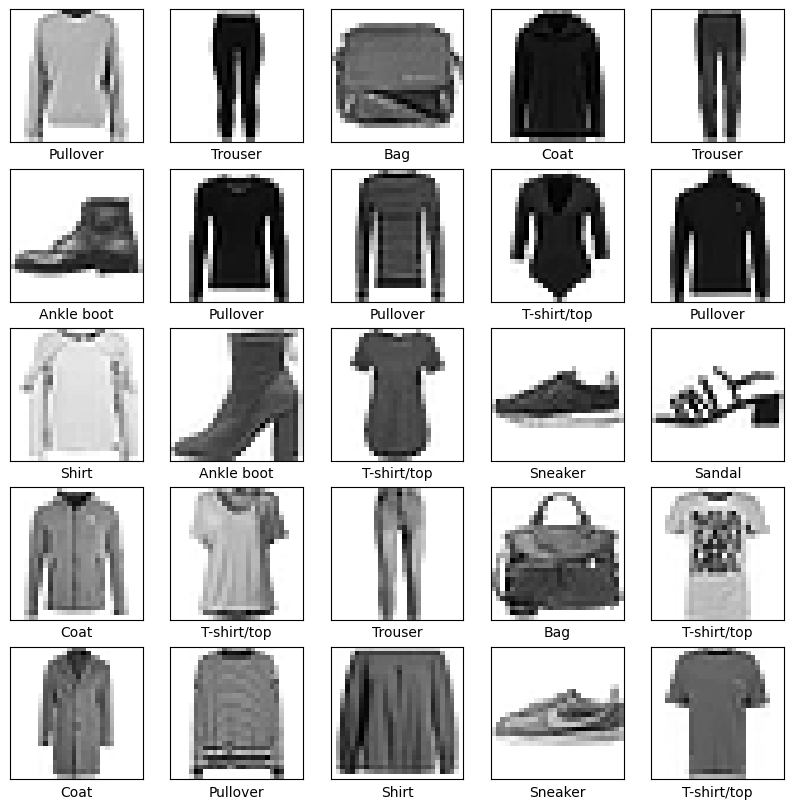

In [30]:
# draw more
#Dibujar mas
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data_train.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(labels[label])
plt.show()

In [31]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 black and white
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # clasiffication
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # used in classification
    metrics=['accuracy']
)

In [33]:
len_train = metadata.splits['train'].num_examples
len_test = metadata.splits['test'].num_examples

In [34]:
print(len_train)
print(len_test)

60000
10000


In [35]:
BATCH_SIZE = 64
data_train = data_train.repeat().shuffle(len_train).batch(BATCH_SIZE)
data_test = data_test.batch(BATCH_SIZE)

In [36]:
import math

# train
historic = model.fit(data_train, epochs=50, steps_per_epoch=math.ceil(len_train/BATCH_SIZE))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7440 - loss: 0.7747
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8553 - loss: 0.4081
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8656 - loss: 0.3759
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8753 - loss: 0.3417
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8835 - loss: 0.3247
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8907 - loss: 0.3057
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8914 - loss: 0.2943
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8959 - loss: 0.2871
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8963 - loss: 0.2797
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9021 - loss: 0.2634
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9019 - loss: 0.2608
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/ste

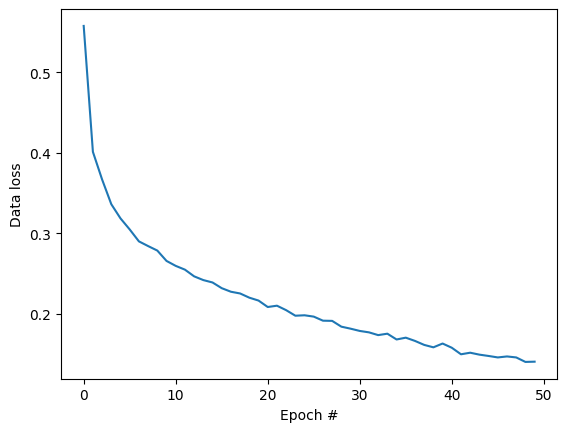

In [37]:
plt.xlabel("Epoch #")
plt.ylabel("Data loss")
plt.plot(historic.history["loss"])

In [40]:
# Prdictions
import numpy as np

for test_images, test_labels in data_test.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()

  prediction = model.predict(test_images)

def image_plot(i, arr_predictions, real_labels, images):
  arr_predictions, real_label, img = arr_predictions[i], real_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  label_prediction = np.argmax(arr_predictions)
  if label_prediction == real_label:
    color = 'blue' # Correct prediction
  else:
    color = 'red' # Failed prediction

  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[label_prediction],
      100*np.max(arr_predictions),
      class_names[real_label],
      color=color
  ))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [42]:
def plot_array_value(i, arr_predictions, real_label):
  arr_predictions, real_label = arr_predictions[i], real_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plot= plt.bar(range(10), arr_predictions, color = '#777777')
  plt.ylim([0,1])
  label_prediction = np.argmax(arr_predictions)

  plot[label_prediction].set_color('red')
  plot[real_label].set_color('blue')

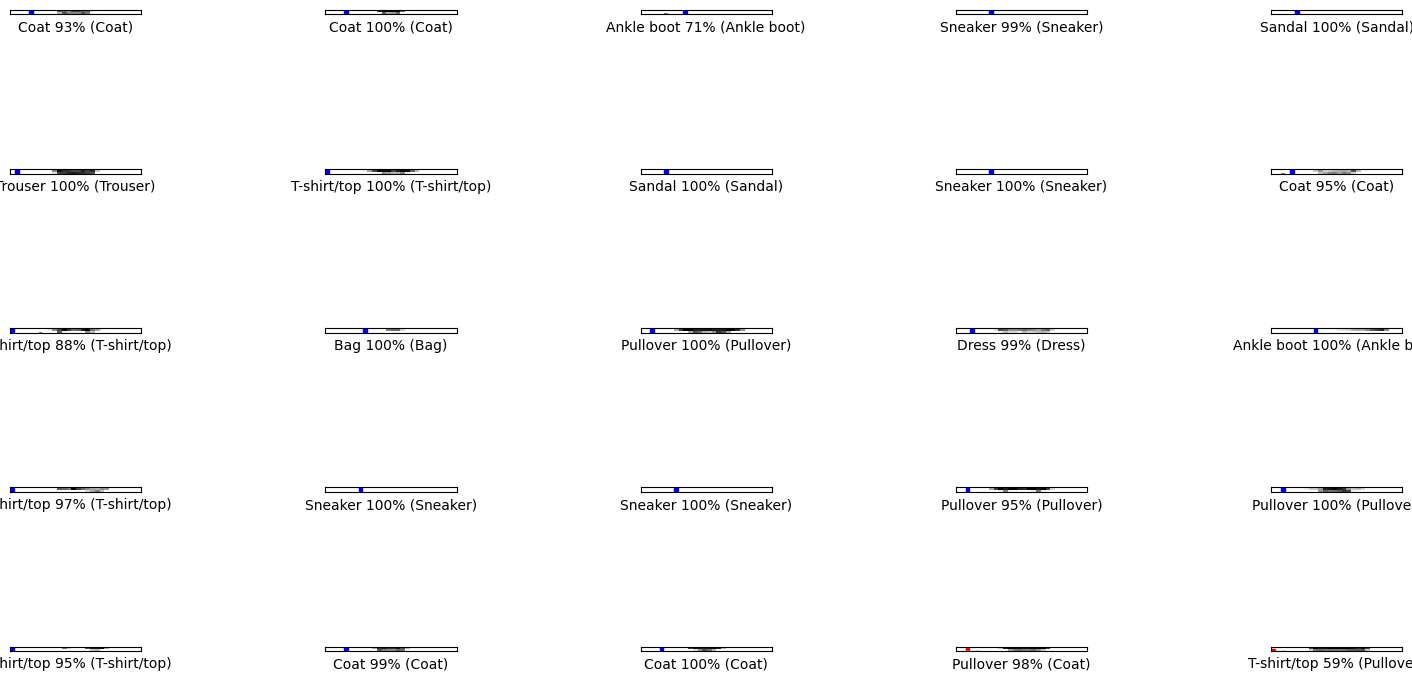

In [43]:
rows = 5
columns = 5
num_images = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_images):
  plt.subplot(rows, 2*columns, 2*i+1)
  image_plot(i, prediction, test_labels, test_images)
  plt.subplot(rows, 2*columns, 2*i+1)
  plot_array_value(i, prediction, test_labels)